>### ㄓˊ ㄐㄧㄝ ㄈㄨˋ ㄓˋ ㄒㄧㄚˋ ㄇ一ㄢˋ ㄉ一ˋ 一 ㄔㄨㄢˋ ㄐㄧㄡˋ ㄎㄜˇ 一ˇ ㄌ一ㄢˊ 一ㄡ ㄎㄡ ㄍㄚ ㄨㄚ

In [8]:
# Connect YOKOGAWA DC supplys, please make sure the status is in current mode and not 
import pyvisa
from tsai14 import YOKOGAWA
rm = pyvisa.ResourceManager()
yoko1 = YOKOGAWA('DC1', rm.open_resource('USB0::0x0B21::0x0039::90ZC38697::0::INSTR'))
yoko2 = YOKOGAWA('DC2', rm.open_resource('USB0::0x0B21::0x0039::90ZC38696::0::INSTR'))
yoko3 = YOKOGAWA('DC3', rm.open_resource('USB0::0x0B21::0x0039::9017D5818::0::INSTR'))
yoko4 = YOKOGAWA('DC4', rm.open_resource('USB0::0x0B21::0x0039::9017D5816::0::INSTR'))

# set them to highest range
yoko1.operation_setting('CURR', 200e-3)
yoko2.operation_setting('CURR', 200e-3)
yoko3.operation_setting('CURR', 200e-3)
yoko4.operation_setting('CURR', 200e-3)

# make their level sources to go zero
YOKOGAWA.wait_for_sweeping(
    yoko1.sweep(0e-3, 0.1, 5e-3),
    yoko2.sweep(0e-3, 0.1, 5e-3),
    yoko3.sweep(0e-3, 0.1, 5e-3),
    yoko4.sweep(0e-3, 0.1, 5e-3)
)

# define the demag path
path = [150e-3, -120e-3, 90e-3, -60e-3, 20e-3, -10e-3, 5e-3, -1e-3, 0.00]

# demag, one can add # at front to only demag some of dcs
yokos = [
    #yoko1,
    #yoko2,
    yoko3,
    yoko4
]
for yoko in yokos: yoko.output('ON')
YOKOGAWA.demag(
    yokos,
    path,
    sweep_delta_time=0.05,
    sweep_delta_current=2e-3
)
for yoko in yokos: yoko.output('OFF')

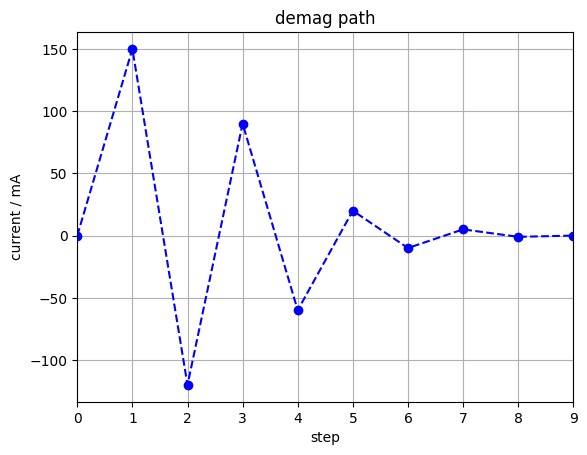

In [7]:
# plot the demag path
from matplotlib import pyplot as np
import numpy as plt
path = plt.array([0, 150e-3, -120e-3, 90e-3, -60e-3, 20e-3, -10e-3, 5e-3, -1e-3, 0.00])
np.plot(1000 * path, 'b--o')
np.title('demag path')
np.xlabel('step')
np.ylabel('current / mA')
np.xlim([0, len(path)-1])
np.grid()
np.show()